In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#mapeando uma esfera em um elipsoide
theta = [np.pi/15, -np.pi/9, -np.pi/20] #ângulos para rotação
sigmas = np.diag([3, 1, 0.5]) #escalares para esticar

In [7]:
Rx = np.array(
    [[1,0,0], 
    [0, np.cos(theta[0]), -np.sin(theta[0])], 
    [0, np.sin(theta[0]), np.cos(theta[0])]]
)

Ry = np.array(
    [[np.cos(theta[1]), 0, np.sin(theta[1])],
    [0, 1, 0],
    [-np.sin(theta[1]), 0, np.cos(theta[1])]]
)

Rz = np.array(
    [[np.cos(theta[2]), -np.sin(theta[2]), 0],
    [np.sin(theta[2]), np.cos(theta[2]), 0],
    [0, 0, 1]]
)

In [8]:
X = Rz @ Ry @ Rx @ sigmas

(-2.0, 2.0)

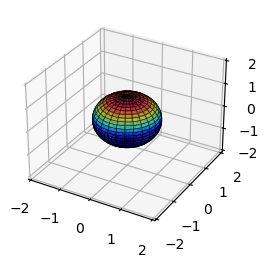

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')

u = np.linspace(-np.pi, np.pi, 100) # -pi <= theta <= pi
v = np.linspace(0, np.pi, 100) # 0 <= fi <= pi 

#coordenadas esféricas
x = np.outer(np.cos(u), np.sin(v)) #x = ro * sin(fi) * cos(theta)
y = np.outer(np.sin(u), np.sin(v)) #y = ro * sin(fi) * sin(theta)
z = np.outer(np.ones(np.size(u)), np.cos(v)) # z = ro * cos(fi)

surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

In [12]:
xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

In [13]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

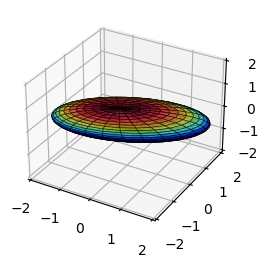

In [16]:
fig = plt.figure()
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()